In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
data = pd.read_json ("dscovr/mag-7-day.json", lines=False)
columnames=data.iloc[0].values
data= data.iloc[1:]
data.set_axis(columnames,axis=1,inplace=True)
data['datetime']=pd.to_datetime(data.time_tag, format='%Y-%m-%d %H:%M:%S',utc=True)
data.set_index(['datetime'],drop=True, inplace=True)


In [52]:
flag=np.logical_and(data.index>"2021-05-05",data.index<"2021-06")

In [53]:
data.head()

,time_tag,bx_gsm,by_gsm,bz_gsm,lon_gsm,lat_gsm,bt
datetime,,,,,,,
2021-04-29 12:47:00+00:00,2021-04-29 12:47:00.000,2.03,-0.09,-4.35,357.53,-64.96,4.81
2021-04-29 12:48:00+00:00,2021-04-29 12:48:00.000,2.06,0.05,-4.24,1.41,-64.10,4.72
2021-04-29 12:49:00+00:00,2021-04-29 12:49:00.000,2.09,0.02,-4.12,0.47,-63.06,4.62
2021-04-29 12:50:00+00:00,2021-04-29 12:50:00.000,2.10,-0.07,-4.08,358.22,-62.81,4.59
2021-04-29 12:51:00+00:00,2021-04-29 12:51:00.000,2.20,-0.20,-4.12,354.90,-61.83,4.67


In [54]:
data['phi_b']=np.arctan2(data['bz_gsm'].astype(float),data['bx_gsm'].astype(float))/np.pi*180
#flag_n=data['phi_b']<0
#data['phi_b'][flag_n]=data['phi_b'][flag_n]+360


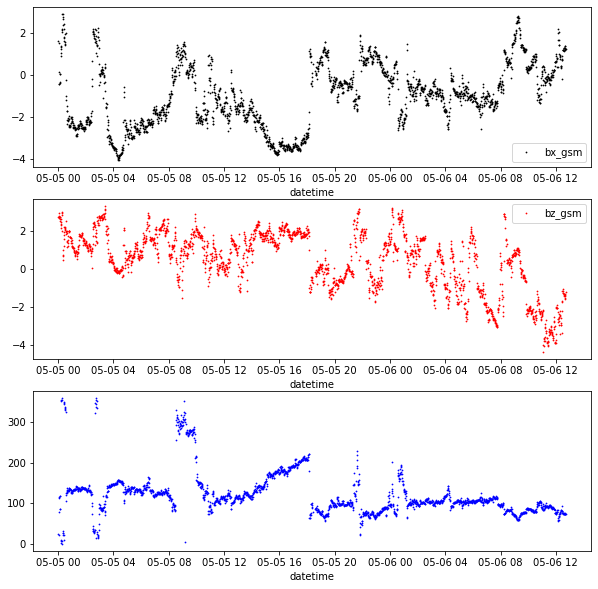

In [55]:
fig, axes = plt.subplots(4,1, figsize=(10,10), sharex=True)
plt.subplot(311)
axes =data['bx_gsm'].astype(float)[flag].plot(marker='.',markersize=1.5,linestyle='None',legend=True,alpha=1,color='black', subplots=True)
ax = plt.gca()
plt.subplot(312)
axes =data['bz_gsm'].astype(float)[flag].plot(marker='.',markersize=1.5,linestyle='None',legend=True,alpha=1,color='red', subplots=True)
ax = plt.gca()
plt.subplot(313)
axes =data['lon_gsm'].astype(float)[flag].plot(marker='.',markersize=1.5,linestyle='None',legend=False,alpha=1,color='blue', subplots=True)
ax = plt.gca()

In [49]:
data['phi_b'][flag][100:200]

datetime
2021-04-29 14:27:00+00:00     6.100060
2021-04-29 14:28:00+00:00     9.752425
2021-04-29 14:29:00+00:00    18.586927
2021-04-29 14:30:00+00:00    28.405246
2021-04-29 14:31:00+00:00    22.659352
                               ...    
2021-04-29 16:02:00+00:00    -9.833564
2021-04-29 16:03:00+00:00    -9.462322
2021-04-29 16:04:00+00:00   -11.309932
2021-04-29 16:05:00+00:00   -18.152706
2021-04-29 16:06:00+00:00    19.476575
Name: phi_b, Length: 100, dtype: float64